In [ ]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [21]:
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')

In [22]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [23]:
df_hp_price = df[['horsepower', 'price']]

In [24]:
df_hp_price

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0
...,...,...
200,114,16845.0
201,160,19045.0
202,134,21485.0
203,106,22470.0


## Plot the dataset

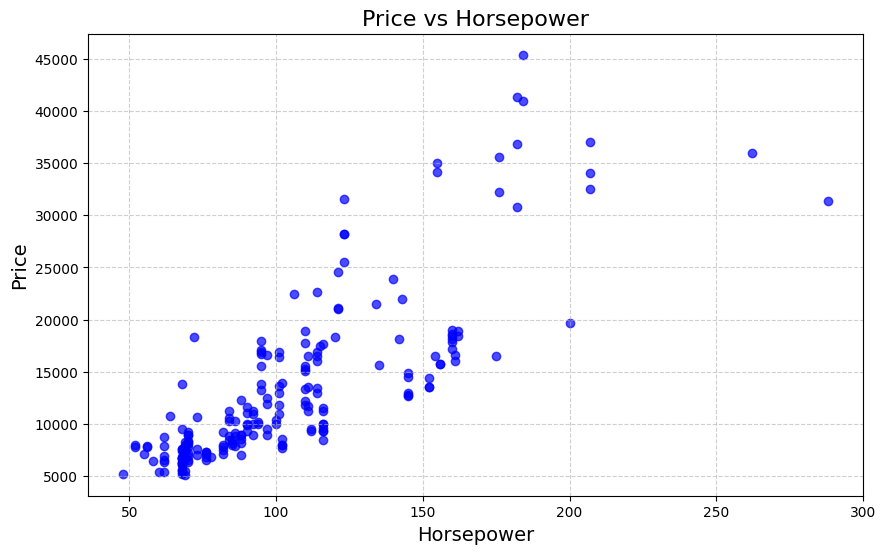

In [25]:
# Plot the data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(df_hp_price['horsepower'], df_hp_price['price'], color='blue', alpha=0.7)

# Add labels and title
plt.title('Price vs Horsepower', fontsize=16)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Show grid and plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [26]:
x = np.array(df_hp_price['horsepower'])

In [27]:
x = x.reshape(x.shape[0], 1)

In [28]:
x.shape

(205, 1)

In [29]:
y = np.array(df_hp_price['price'])

In [30]:
y = y.reshape(y.shape[0],1)

## Splitting training and testing samples

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = regressor.predict(X_test)

## Plot the predicted values

Text(0, 0.5, 'Price in Dollars')

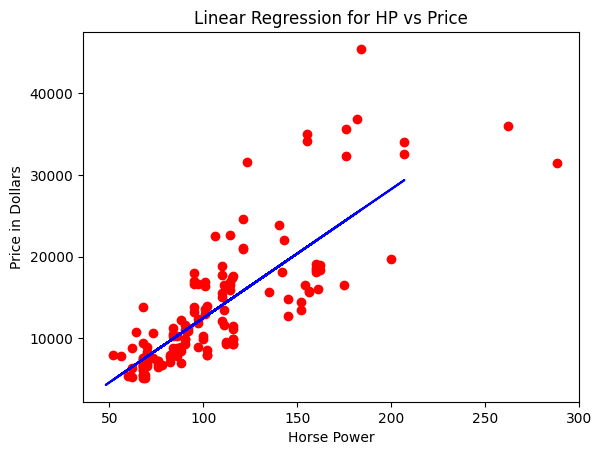

In [34]:
plt.scatter(X_train, y_train, color = 'r')
plt.plot(X_test, y_pred, color = 'blue')
plt.title("Linear Regression for HP vs Price")
plt.xlabel("Horse Power")
plt.ylabel("Price in Dollars")